In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# importar todos os pacotes necessários para usar os vários algoritmos de classificação
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# pegando base de dados de um file no desktop chamado Coisas
roupas = pd.read_csv("C:\\Users\\Otavia\\Desktop\\Dados\\roupas.csv")

In [3]:
# mostrando os 3 primeiros itens da base de dados
roupas.head(3)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.0,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08


In [4]:
#Dropando todas as informações não importantes
roupas.drop('currency_buyer',axis=1,inplace=True)
roupas.drop('has_urgency_banner',axis=1,inplace=True)
roupas.drop('urgency_text',axis=1,inplace=True)
roupas.drop('crawl_month',axis=1,inplace=True)
roupas.drop('merchant_name',axis=1,inplace=True)
roupas.drop('merchant_title',axis=1,inplace=True)
roupas.drop('merchant_has_profile_picture',axis=1,inplace=True)
roupas.drop('merchant_profile_picture',axis=1,inplace=True)
roupas.drop('merchant_rating_count',axis=1,inplace=True)
roupas.drop('merchant_info_subtitle',axis=1,inplace=True)
roupas.drop('merchant_id',axis=1,inplace=True)
roupas.drop('uses_ad_boosts',axis=1,inplace=True)
roupas.drop('badges_count',axis=1,inplace=True)
roupas.drop('badge_local_product',axis=1,inplace=True)
roupas.drop('badge_fast_shipping',axis=1,inplace=True)
roupas.drop('badge_product_quality',axis=1,inplace=True)
roupas.drop('shipping_is_express',axis=1,inplace=True)
roupas.drop('shipping_option_name',axis=1,inplace=True)
roupas.drop('shipping_option_price',axis=1,inplace=True)
roupas.drop('inventory_total',axis=1,inplace=True)
roupas.drop('product_url',axis=1,inplace=True)
roupas.drop('product_picture',axis=1,inplace=True)
roupas.drop('product_id',axis=1,inplace=True)
roupas.drop('theme',axis=1,inplace=True)

roupas = roupas.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) #remove itens(rows) com dados nulos

In [5]:
# mostra todas as informaçoes das colunas da base de dados
roupas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 1572
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        1461 non-null   object 
 1   title_orig                   1461 non-null   object 
 2   price                        1461 non-null   float64
 3   retail_price                 1461 non-null   int64  
 4   units_sold                   1461 non-null   int64  
 5   rating                       1461 non-null   float64
 6   rating_count                 1461 non-null   int64  
 7   rating_five_count            1461 non-null   float64
 8   rating_four_count            1461 non-null   float64
 9   rating_three_count           1461 non-null   float64
 10  rating_two_count             1461 non-null   float64
 11  rating_one_count             1461 non-null   float64
 12  tags                         1461 non-null   object 
 13  product_color     

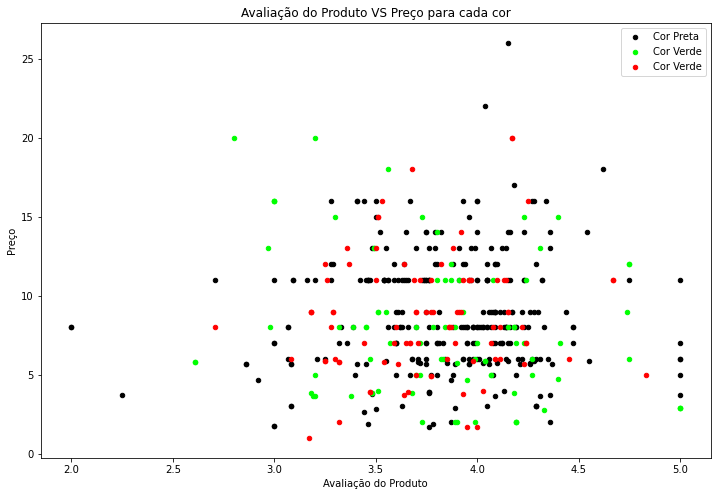

In [6]:
# Usando graficos

fig = roupas[roupas.product_color=='black'].plot(kind='scatter',x='rating',y='price',color='black', label='Cor Preta')
roupas[roupas.product_color=='green'].plot(kind='scatter',x='rating',y='price',color='lime', label='Cor Verde',ax=fig)
roupas[roupas.product_color=='red'].plot(kind='scatter',x='rating',y='price',color='red', label='Cor Verde',ax=fig)
fig.set_xlabel("Avaliação do Produto")
fig.set_ylabel("Preço")
fig.set_title("Avaliação do Produto VS Preço para cada cor")
fig=plt.gcf() # retorna a figura que está em construção
fig.set_size_inches(12,8)
plt.show()

# O grafico acima apresenta uma tabela que mostra a relação que o preço e a avaliação dos compradores tem com a cor
# do produto comprado

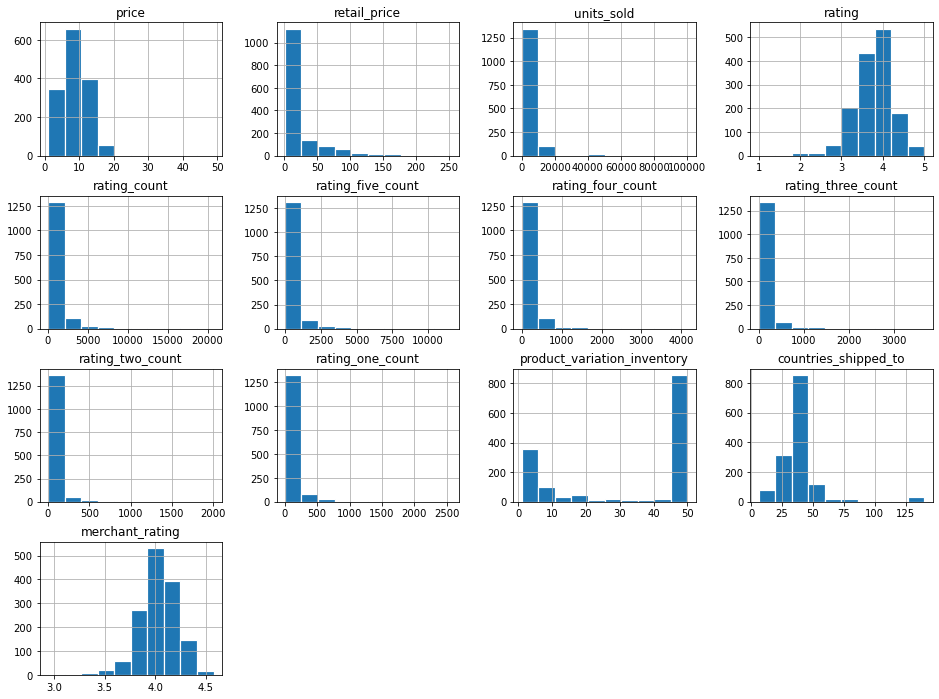

In [7]:
plt.close()
roupas.hist(edgecolor='white', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(16,12)
plt.show()

# grafico comparando a mudança dos valores em cada coluna da base de dados

# Recomendação - Filtro Demográfico

In [8]:
# media das notas dada as roupas
C = roupas['rating'].mean()
C

# numero de notas dada as roupas no geral 
# (a função quantile dita que para a roupa ser classificada, ela precisa ter mais notas dadas que 80% da media)
m = roupas['rating_count'].quantile(0.8)
m

def weighted_rating(x, m=m, C=C):
    v = x['rating_count']
    R = x['rating']
    # Calculo baseado na formula da IMDB
    return (v/(v+m) * R) + (m/(m+v) * C)

roupas['nota'] = roupas.apply(weighted_rating, axis=1)

#Organizando lista baseada na nota das roupas
roupas = roupas.sort_values('nota', ascending=False)

#Top 10 roupas
roupas[['title_orig', 'price', 'rating', 'nota']].head(10)

,title_orig,price,rating,nota
84,2018 Summer Fashion Women Tank Tops Sexy Women...,7.00,4.41,4.370521
1497,Fashion Ocean Wave Silver & Rose Gold Ring Sum...,3.66,4.48,4.364177
1152,FUERFITS Women's Casual Beach Summer Sleeveles...,8.00,4.39,4.279193
1020,Summer Steering Wheel Sunshade Swim Ring Car I...,19.00,4.40,4.254020
461,COMENII Summer Women Sexy Tops Button Deep V-N...,7.00,4.41,4.236885
1516,Women Plus Size Monokini Gothic Black Skull Be...,15.00,4.34,4.209671
528,Women&#39;s Fashion Flannel Caroset Pleated El...,7.00,4.47,4.202137
708,Women's Shorts Spring Summer Leopard/Multicolo...,6.00,4.35,4.200452
1106,20Pairs/lot Summer Ultrathin Transparent Cryst...,2.00,4.36,4.195346
347,Summer Students Style Bodycon Rompers Womens ...,11.00,4.32,4.189182


In [9]:
# A lista tambem pode ser definida com outros paramentros, como o menor preço da roupa
roupas = roupas.sort_values('price', ascending=True)

#Top 10 roupas
roupas[['title_orig', 'price', 'rating', 'nota']].head(10)

,title_orig,price,rating,nota
52,Womens Fashion 3D Skull Print Cut Out Back Tan...,1.00,3.80,3.779983
1443,New Fashion Summer Women Casual Dress Round Ne...,1.00,3.75,3.779795
1368,Plus Size XS-3XL Women Summer Indoor Sports Pa...,1.00,3.17,3.776775
442,New Fashion Summer Women Casual Dress Round Ne...,1.65,3.67,3.764429
454,New Fashion Summer Women Casual Dress Round Ne...,1.65,3.67,3.764429
1322,Summer New Plus Size Tank Top for Women Spagh...,1.66,3.75,3.779393
1435,Women's Fashion Summer Clothes Cotton V-neck S...,1.67,3.59,3.774825
403,Women Summer New Flip Flops Sandals Beach Shoe...,1.68,3.95,3.808732
153,New Fashion Summer Women Casual Dress Round Ne...,1.68,3.67,3.778778
1401,New Fashion Summer Women Casual Dress Round Ne...,1.68,3.67,3.778778


In [10]:
# Ou como a maior media de notas

roupas = roupas.sort_values('rating', ascending=False)

#Top 10 roupas
roupas[['title_orig', 'price', 'rating', 'nota']].head(10)

,title_orig,price,rating,nota
312,Summer New Europe and The United States Sexy R...,8.00,5.0,3.793351
1403,Summer New Women Casual Sleeveless Jumpsuits ...,6.00,5.0,3.781987
1433,Short Sleeve Beach Dress Women Summer Print V ...,8.00,5.0,3.781987
212,Short Sleeve Beach Dress Women Summer Print V ...,8.00,5.0,3.781987
801,M-XXL Size Summer New Ladies Butterfly Printin...,8.00,5.0,3.780943
846,Summer New Europe and The United States Sexy R...,8.00,5.0,3.793351
370,2020 New Upgrade 170/150/100/30CM Inflatable S...,11.00,5.0,3.783028
1172,New Women Fashion Shorts Yoga Shorts Summer Be...,11.00,5.0,3.780943
1434,Summer Casual Front Knot Cotton Sleeveless Irr...,2.69,5.0,3.780943
991,2020 Summer Men's Classic Shorts Multi-pocket ...,7.00,5.0,3.781987


# Recomendação -  Filtragem baseada em conteudo

In [11]:
tfidf = TfidfVectorizer(stop_words='english')

roupas['title_orig'] = roupas['title_orig'].fillna('')

tfidf_matrix = tfidf.fit_transform(roupas['title_orig'])

tfidf_matrix.shape
# esse codigo pega as palavras em ingles do tiulo das roupas, retira palavras comuns tipo "to" e "a", e as transforma em dados 
# para serem comparados

(1461, 1184)

In [12]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

indices = pd.Series(roupas.index, index=roupas['title_orig']).drop_duplicates()
indices.head()

title_orig
Summer New Europe and The United States Sexy Round Neck Pocket Stripes Printed Hip Dress Women                      312
Summer New Women Casual Sleeveless  Jumpsuits  Solid Color Suspender Ttrousers Loose Overalls Plus Size            1403
Short Sleeve Beach Dress Women Summer Print V Neck Dress Loose Casual Pullover Midi Dress                          1433
Short Sleeve Beach Dress Women Summer Print V Neck Dress Loose Casual Pullover Midi Dress                           212
M-XXL Size Summer New Ladies Butterfly Printing Bohemian Beach Skirt v-Neck Sleeveless Casual Temperament Dress     801
dtype: int64

In [13]:
# Obtenha o índice da roupa que corresponde ao título
idx = indices['Top Swimsuit Sets Fashion Swimwear Women Bikini 2016 Sexy Padded']
idx

# Obtenha as pontuações de semelhança entre pares de todas as roupas com aquela roupa
sim_scores = list(enumerate(cosine_sim[idx]))
#type(sim_scores)
#print(sim_scores)

# Classifique as roupas com base nas pontuações de similaridade
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
#print(sim_scores)

In [14]:
# Obtenha as pontuações das 10 roupas mais semelhantes
sim_scores = sim_scores[1:11]
sim_scores

[(20, 1.0000000000000002),
 (442, 0.9165726554839693),
 (857, 0.9133850822341405),
 (858, 0.9133850822341405),
 (1031, 0.5597713116616388),
 (1268, 0.5056716486824144),
 (1269, 0.5056716486824144),
 (731, 0.4955430277705881),
 (1434, 0.4692064279309649),
 (630, 0.43866329029289214)]

In [15]:
# Obtenha os índices de roupas
movie_indices = [i[0] for i in sim_scores]
movie_indices

[20, 442, 857, 858, 1031, 1268, 1269, 731, 1434, 630]

In [16]:
# msotrando as 10 roupas mais parecidas com o exemplo inserido
roupas['title_orig'].iloc[movie_indices]

676     Ladies Summer Tie Dye Print Short Sleeve Off S...
1129    2019 Women Ladies Fashion Plus Size Summer Tie...
1051    2020 Women Ladies Fashion Plus Size Summer Tie...
1288    2020 Women Ladies Fashion Plus Size Summer Tie...
1408    Summer Women's Fashion Tie Dye Print Tassel Sl...
1111    Women's Fashion Plus Size Casual Short Sleeve ...
782     Women's Fashion Plus Size Casual Short Sleeve ...
874     Women Fashion Tie Dye Printed Two Piece Sets S...
1195    Letter Print Tie Dye Halter Sleeveless Long Dr...
662     2020 Summer New Fashion Women's Tie-dye Gradie...
Name: title_orig, dtype: object

SIMPLIFICANDO TUDO EM UMA UNICA FUNÇÃO!!!

In [17]:
# Função que recebe o título do filme como entrada e produz a maioria dos filmes semelhantes
def get_recommendations(title_orig, cosine_sim=cosine_sim):
    # Obtenha o índice do filme que corresponde ao título
    idx = indices[title_orig]
    
        # Obtenha as pontuações de semelhança entre pares de todas as roupas com aquela roupa
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Classifique as roupas com base nas pontuações de similaridade
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtenha as pontuações das 10 roupas mais semelhantes
    sim_scores = sim_scores[1:11]

    # Obtenha os índices das roupas
    movie_indices = [i[0] for i in sim_scores]

    # Retornando os 10 principais roupas mais semelhantes
    return roupas['title_orig'].iloc[movie_indices]

In [19]:
# O resultado é...
get_recommendations("Summer Women Plus Size Casual Loose V Neck Short Sleeve Floral Printed Blouse Tops")

789     2020 Summer Men's Classic Shorts Multi-pocket ...
261     Summer Men's Classic Shorts Multi-pocket Casua...
577     Summer Men Fashion Short Pants Beach Casual Sh...
1425    Summer Men Fashion Short Pants Beach Casual Sh...
808     Men's Summer Outdoor Cargo Shorts Relaxed Fit ...
365     Summer Men's Fashion Short Pants Trousers Loos...
99      Men Cotton Overalls Camouflage Loose Shorts El...
167     Summer Fashion Men'S Sport Athletic Shorts Pan...
489     2020 New Men's Fashion Short Sleeve T-Shirt   ...
1501    New Women's Summer Causal Shorts Drawstring Sh...
Name: title_orig, dtype: object

# Classificação

In [51]:
train, test = train_test_split(roupas, test_size = 0.1)# neste, nossos dados principais são divididos em treinar e testar
# o atributo test_size = 0.1 divide os dados em uma proporção de 90% e 10%. treinar = 90% e teste = 10%
print(train.shape)
print(test.shape)

(1314, 20)
(147, 20)


In [52]:
train

train_X = train[['price','rating_count','rating','units_sold']]# pegando os dados a srem treinados
train_y=train.units_sold # pegando o resultado do treinamento

In [53]:
test_X= test[['price','rating_count','rating','units_sold']] # taking test data features
test_y =test.units_sold  # pegando o resutado dos testes

Regressão Logistica

In [54]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('A precisão da regressão logistica é',metrics.accuracy_score(test_y, prediction))

A precisão da regressão logistica é 0.1564625850340136


C:\Users\Otavia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K-Nearest Neighbours (KNN)

In [55]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('A precisão do KNN é',metrics.accuracy_score(test_y, prediction))

A precisão do KNN é 0.9931972789115646
